# Human Activity Recognisation Dataset

## Problem statement 

In this project we will try to predict human activity (1-Walking, 2-Walking upstairs, 3-Walking downstairs, 4-Sitting, 5-Standing or 6-Laying) by using the smartphone’s sensors. Meaning that by using the following methods, the smartphone can detect what we are doing at the moment.
This data set is collected from recordings of 30 human subjects captured via smartphones
enabled with embedded inertial sensors. This is a multi-classification problem. The data set
has 10,299 rows and 561 columns. 

## Applications and Potential Use

1. Daily Life Monitoring:  Applications in Daily Life Monitoring aim to provide reference for activity logging and monitor exercise and healthy lifestyle practises. Various Smartphone applications with activity recognition techniques have already shown up and specialised devices such as fitbit etc are also popularised.


2. Elderly and Youth Care: These applications can be used to prevent harm and for safety purposes. It can be used to monitor infant sleep patterns and ASD (autistic spectrum disorder) detection also using activity recognition techniques.


3. Personal Biometric Signature: Motion patterns of an individual are usually exclusive and unique. Sensors such as accelerometers can capture those differences. The activity recognition techniques provide a possible solution for human biometric signature with patterns in gestures.

## Step By Step Approach Analysis

1. Importing data and Elementary Data Analysis
2. Feature selection and engineering using PCA
3. Application of various ML algorithms and performance evaluation using accuracy and confusion matrices.
4. Selection of the best algorithm and removing overfitting if necessary
5. Fine tuning and deploying it for test data 

## Algorithm used

## Packages Used

1. Pandas for importing and handling data.
2. Matplotlib for plotting graphs and other plots used in analysis.
3. Numpy for multi-dimensional array and matrix processing 
4. Scikit Learn for a range of algorithms, including clustering, factor analysis, principal component analysis etc.

### 1.  Import Required Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
with open("features.txt","r") as f:
    features = [line.rstrip() for line in f]
print(len(features),len(set(features)))
print(features)

    

561 561
['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3', 'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Mad-1', 'tBodyAcc-Mad-2', 'tBodyAcc-Mad-3', 'tBodyAcc-Max-1', 'tBodyAcc-Max-2', 'tBodyAcc-Max-3', 'tBodyAcc-Min-1', 'tBodyAcc-Min-2', 'tBodyAcc-Min-3', 'tBodyAcc-SMA-1', 'tBodyAcc-Energy-1', 'tBodyAcc-Energy-2', 'tBodyAcc-Energy-3', 'tBodyAcc-IQR-1', 'tBodyAcc-IQR-2', 'tBodyAcc-IQR-3', 'tBodyAcc-ropy-1', 'tBodyAcc-ropy-2', 'tBodyAcc-ropy-3', 'tBodyAcc-ARCoeff-1', 'tBodyAcc-ARCoeff-2', 'tBodyAcc-ARCoeff-3', 'tBodyAcc-ARCoeff-4', 'tBodyAcc-ARCoeff-5', 'tBodyAcc-ARCoeff-6', 'tBodyAcc-ARCoeff-7', 'tBodyAcc-ARCoeff-8', 'tBodyAcc-ARCoeff-9', 'tBodyAcc-ARCoeff-10', 'tBodyAcc-ARCoeff-11', 'tBodyAcc-ARCoeff-12', 'tBodyAcc-Correlation-1', 'tBodyAcc-Correlation-2', 'tBodyAcc-Correlation-3', 'tGravityAcc-Mean-1', 'tGravityAcc-Mean-2', 'tGravityAcc-Mean-3', 'tGravityAcc-STD-1', 'tGravityAcc-STD-2', 'tGravityAcc-STD-3', 'tGravityAcc-Mad-1', 'tGravityAcc-Mad-2', 'tGravityA

In [ ]:
labels = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "STANDING",
    "LAYING"
]

In [ ]:
tuple(features)
train_df = pd.read_csv("X_train.txt", delim_whitespace = True, names = features)

train_df["subject_id"] = pd.read_csv(r"/Users/aditijain/Desktop/PythonPractice/HAR/subject_id_train.txt", header = None)

train_df["activity"] = pd.read_csv(r"/Users/aditijain/Desktop/PythonPractice/HAR/y_train.txt", header = None)
label_name = train_df["activity"].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
train_df["activity"] = label_name

train_df.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject_id,activity
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,1,STANDING
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1,STANDING
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1,STANDING
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1,STANDING
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1,STANDING


In [ ]:
test_df = pd.read_csv("X_test.txt", delim_whitespace = True, header=None, names=features)
test_df["subject_id"] = pd.read_csv(r"/Users/aditijain/Desktop/PythonPractice/HAR/subject_id_test.txt", header = None)
test_df["activity"] = pd.read_csv(r"/Users/aditijain/Desktop/PythonPractice/HAR/y_test.txt", header = None)

label_name = test_df["activity"].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
test_df["activity"] = label_name

test_df.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject_id,activity
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074,2,STANDING
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825,2,STANDING
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302,2,STANDING
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079,2,STANDING
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849,2,STANDING


In [ ]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)
train_df.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject_id,activity
0,0.052520,-0.001250,-0.003802,-0.948630,-0.968004,-0.956803,-0.953104,-0.970856,-0.961580,-0.714135,...,0.048194,-0.138448,0.116325,0.065941,0.053333,0.630998,-0.842165,-0.141317,5,LYING
1,0.039494,-0.003133,-0.016095,-0.997558,-0.999041,-0.988149,-0.997518,-0.998806,-0.989076,-0.801028,...,-0.870850,0.010033,-0.715319,0.194203,-0.075639,-0.884256,0.113781,0.107038,16,SITTING
2,0.039518,-0.002884,-0.020717,-0.994640,-0.987065,-0.989854,-0.994926,-0.986552,-0.991715,-0.798674,...,-0.706529,-0.312479,-0.117143,0.057979,-0.094978,-0.589704,0.324938,0.194891,21,STANDING
3,0.046712,-0.007940,-0.024618,-0.971172,-0.950315,-0.954649,-0.974841,-0.956144,-0.965366,-0.747410,...,-0.545206,-0.158907,-0.003600,0.011395,0.020955,-0.455718,-0.104994,-0.296809,19,SITTING
4,0.040404,-0.009002,-0.072913,-0.927496,-0.876523,-0.838014,-0.949784,-0.891345,-0.885635,-0.657831,...,-0.637529,0.003236,0.194214,0.618079,-0.790294,-0.910654,0.156849,0.003555,30,STANDING


In [ ]:
print(train_df.shape)
print(test_df.shape)

(7767, 563)
(3162, 563)


### 2. EDA

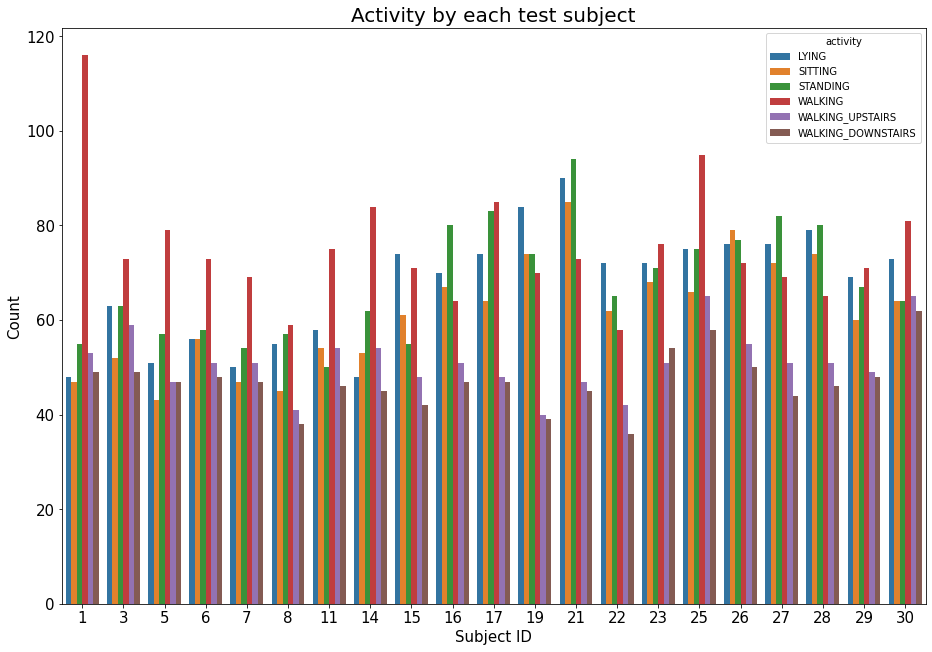

In [ ]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 20)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject_id", hue = "activity", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

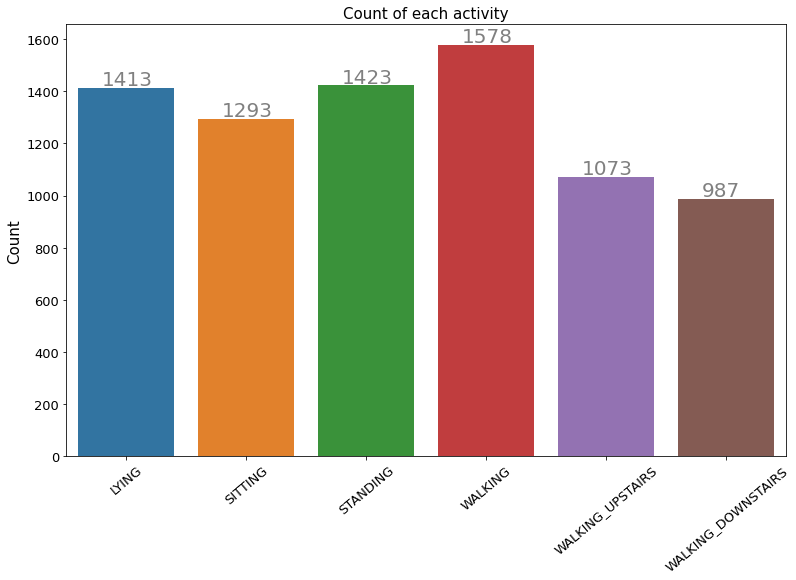

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

<Figure size 576x576 with 0 Axes>

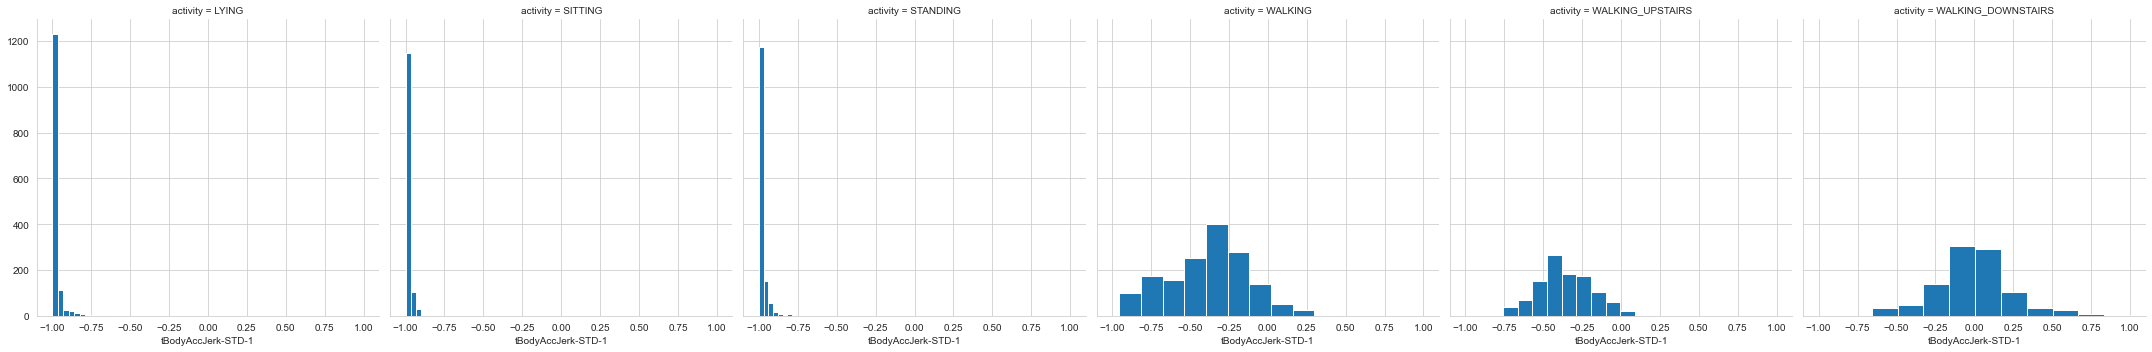

In [ ]:
fig= plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
g = sns.FacetGrid(train_df,col='activity',height=5)
g.map(plt.hist,'tBodyAccJerk-STD-1')

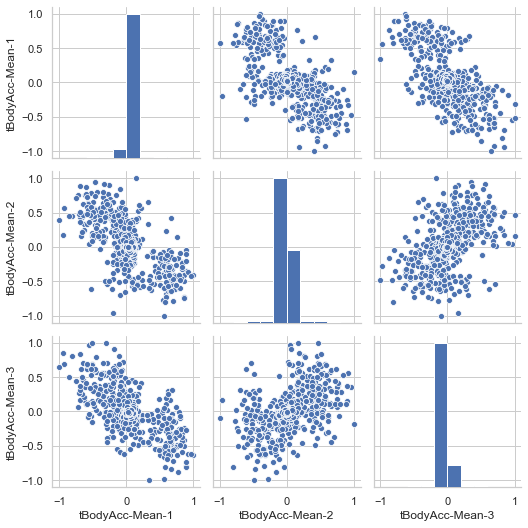

In [ ]:
sns.set(style='whitegrid',context='notebook')
cols=['tBodyAcc-Mean-1','tBodyAcc-Mean-2','tBodyAcc-Mean-3']

sns.pairplot(train_df[cols],size=2.5)
plt.tight_layout()
plt.show()

In [ ]:
pivoted=train_df.pivot_table(index='subject_id',columns='activity',aggfunc='count').iloc[:,:6]

count_df=pd.DataFrame(pivoted.to_records())
count_df=count_df.set_index('subject_id')
count_df.columns=['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
count_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject_id,,,,,,
1,48,47,55,116,49,53
3,63,52,63,73,49,59
5,51,43,57,79,47,47
6,56,56,58,73,48,51
7,50,47,54,69,47,51
8,55,45,57,59,38,41
11,58,54,50,75,46,54
14,48,53,62,84,45,54
15,74,61,55,71,42,48


In [ ]:
duration_df=count_df*2.5
duration_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject_id,,,,,,
1,120.0,117.5,137.5,290.0,122.5,132.5
3,157.5,130.0,157.5,182.5,122.5,147.5
5,127.5,107.5,142.5,197.5,117.5,117.5
6,140.0,140.0,145.0,182.5,120.0,127.5
7,125.0,117.5,135.0,172.5,117.5,127.5
8,137.5,112.5,142.5,147.5,95.0,102.5
11,145.0,135.0,125.0,187.5,115.0,135.0
14,120.0,132.5,155.0,210.0,112.5,135.0
15,185.0,152.5,137.5,177.5,105.0,120.0


In [ ]:
duration_df['ACTIVE']=duration_df['WALKING']+duration_df['WALKING_DOWNSTAIRS']+duration_df['WALKING_UPSTAIRS']
duration_df['PASSIVE']=duration_df['LAYING']+duration_df['SITTING']+duration_df['STANDING']
duration_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,ACTIVE,PASSIVE
subject_id,,,,,,,,
1,120.0,117.5,137.5,290.0,122.5,132.5,545.0,375.0
3,157.5,130.0,157.5,182.5,122.5,147.5,452.5,445.0
5,127.5,107.5,142.5,197.5,117.5,117.5,432.5,377.5
6,140.0,140.0,145.0,182.5,120.0,127.5,430.0,425.0
7,125.0,117.5,135.0,172.5,117.5,127.5,417.5,377.5
8,137.5,112.5,142.5,147.5,95.0,102.5,345.0,392.5
11,145.0,135.0,125.0,187.5,115.0,135.0,437.5,405.0
14,120.0,132.5,155.0,210.0,112.5,135.0,457.5,407.5
15,185.0,152.5,137.5,177.5,105.0,120.0,402.5,475.0


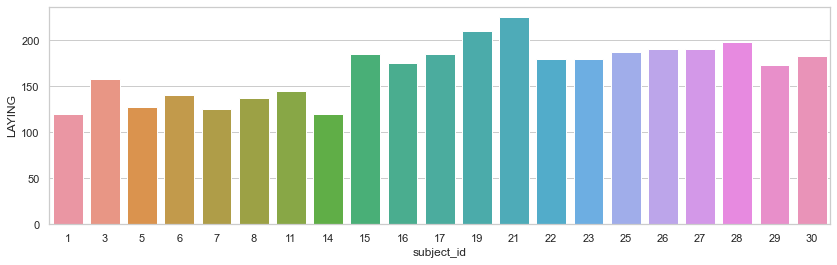

In [ ]:
plt.figure(figsize=(14,4))
sns.barplot(x=duration_df.index,y=duration_df.LAYING)

Observation: Person 1 and 14 sleep very less.

The missing persons in x-axis are present in test data

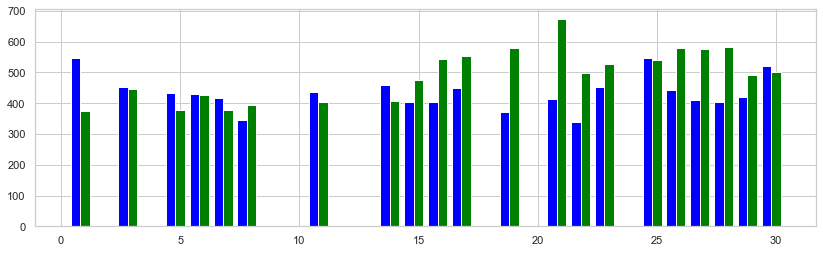

In [ ]:
x=duration_df.index
plt.figure(figsize=(14,4))
ax=plt.subplot(111)
ax.bar(x-0.4,duration_df.ACTIVE,width=0.4,color='blue',align='center')
ax.bar(x,duration_df.PASSIVE,width=0.4,color='green',align='center')
plt.show()

Observation: Person 19 and 20 are highly inactive

### 3. Feature Selection and Dimentionality Reduction

In [ ]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-1].values
y_test = test_df.iloc[:,-1].values
X_train.shape

(7767, 562)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
XTR = pd.DataFrame(X_train.T)
XTE = pd.DataFrame(X_test.T)
#XT.duplicated()

unique_features = [not i for i in XTR.duplicated()]
X_train = XTR[unique_features].T
X_test = XTE[unique_features].T
X_train.shape

(7767, 541)

In [ ]:
df = pd.concat([train_df,test_df])

In [ ]:
df.columns
import re
pattern = r'[()-.,]+'

tempcol = []
col_new = []
for col in train_df.columns:
  new_string = re.sub(pattern, '_', col) 
  col_new.append(new_string)
  tempcol.append(new_string.split('_')[0])
  
df.columns = col_new

print('The main columns are:')
for temp in list(set(tempcol)):
    print(temp)


The main columns are:
fBodyAccJerkMag
tBodyAcc
fBodyGyroMag
tBodyGyroJerk
fBodyGyro
tBodyGyroMag
tBodyAccMag
activity
tBodyGyro
tGravityAcc
fBodyAccJerk
tYAxisAcc
fBodyGyroJerkMag
fBodyAccMag
tGravityAccMag
tXAxisAcc
tBodyGyroJerkMag
tZAxisAcc
tBodyAccJerkMag
fBodyAcc
tBodyAccJerk
subject


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["WALKING", "LAYING", "STANDING", "SITTING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS"])
df['activity'] = le.fit_transform(df['activity'])
df_en = df.drop(columns=['subject_id']) #dropping unwanted columns
df_en_data = df_en.drop(columns = ['activity'])
df_en_target = df_en['activity']
df_en_target.value_counts()

3    2240
2    1979
0    1958
1    1801
5    1544
4    1407
Name: activity, dtype: int64

3    2240
2    1979
0    1958
1    1801
5    1544
4    1407
Name: activity, dtype: int64


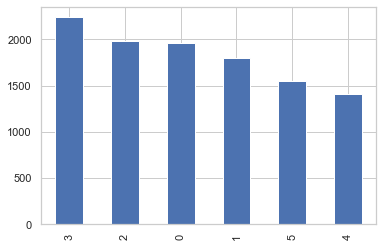

In [ ]:
print(df.activity.value_counts())
df.activity.value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
df_robust = robustscaler.fit_transform(df_en_data)
df_robust

array([[ 1.12847362e+00,  1.01259997e-01,  9.24449920e-01, ...,
         4.28991585e+00, -3.57936411e+00, -5.98391331e-01],
       [ 4.60481580e-02, -1.72670191e-02,  2.03219145e-01, ...,
        -5.53550828e-01, -2.20252829e-01,  4.54595975e-01],
       [ 4.81014124e-02, -1.54521742e-03, -6.79705430e-02, ...,
         3.87976172e-01,  5.21733645e-01,  8.27078898e-01],
       ...,
       [-7.35833311e-03,  1.75489266e+00, -6.96770624e-01, ...,
         6.19233111e-01,  8.96702695e-01,  3.01971664e-02],
       [ 7.67026435e-01,  1.13933797e+01, -4.52152021e+00, ...,
        -5.76074210e-01, -1.02517717e-01,  3.56817269e-01],
       [-1.86952818e-01,  1.42654452e-01,  4.50608642e-01, ...,
         1.72117508e-01, -3.30764725e-01, -9.41499281e-01]])

In [ ]:
print('Covariance matrix \n')
df_en_cov_mat= np.cov(df_robust, rowvar=False)
df_en_cov_mat
df_en_cov_mat = np.cov(df_robust.T)
eig_vals, eig_vecs = np.linalg.eig(df_en_cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
tot = sum(eig_vals)
print("\n",tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance the first 150 principal components each contain\n ",var_exp[0:150])
print("\n\n4. Percentage of variance the first 150 principal components together contain\n",sum(var_exp[0:150]))

Covariance matrix 

Eigenvectors 
[[-8.41908550e-03+0.00000000e+00j  1.15323277e-01+0.00000000e+00j
   7.18770432e-01+0.00000000e+00j ... -5.32159298e-27+1.88443365e-27j
   7.80409485e-27+0.00000000e+00j -4.05466907e-27+0.00000000e+00j]
 [ 7.65410041e-03+0.00000000e+00j -4.83686658e-02+0.00000000e+00j
  -4.55995783e-01+0.00000000e+00j ...  8.10806089e-20-2.34332438e-19j
  -1.93017637e-18+0.00000000e+00j  1.30511540e-18+0.00000000e+00j]
 [ 7.17225625e-03+0.00000000e+00j -1.93272044e-02+0.00000000e+00j
  -3.50168031e-01+0.00000000e+00j ...  1.04608654e-18-5.06131802e-19j
  -3.74361182e-19+0.00000000e+00j -6.84434371e-19+0.00000000e+00j]
 ...
 [-3.41922322e-02+0.00000000e+00j  2.68283800e-02+0.00000000e+00j
   2.66925576e-02+0.00000000e+00j ... -4.46736023e-18+2.84289263e-18j
  -1.42244992e-18+0.00000000e+00j  3.75371028e-18+0.00000000e+00j]
 [ 2.56425700e-02+0.00000000e+00j -2.09954656e-02+0.00000000e+00j
  -1.26572519e-02+0.00000000e+00j ...  4.76197469e-19+1.05151515e-18j
  -5.33995130

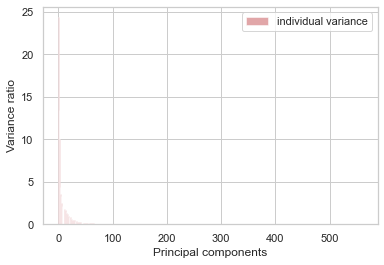

In [ ]:
plt.bar(range(561), var_exp,alpha=0.5,align='center', label='individual variance',color='r')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

Text(0.5, 0, 'Principal components')

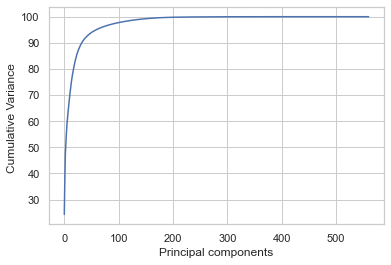

In [ ]:
plt.plot(cum_var_exp)
plt.ylabel('Cumulative Variance ')
plt.xlabel('Principal components')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(df_robust)
df_pca = pd.DataFrame(data = principalComponents)


In [ ]:
#df_application=df_pca.truncate(before=10924)
#print(df_application)

In [ ]:
df_pca.tail()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
10924,-12.950938,-3.908204,0.064513,-1.002410,-2.851520,-1.600953,3.199902,1.177972,-1.294250,-1.143974,...,-0.132795,-0.095358,0.230105,0.726415,-0.272097,0.125043,-0.258652,0.739773,-0.285460,0.535546
10925,4.879497,-0.725218,1.995851,-4.809718,-0.857751,-1.987604,-0.079080,1.471717,0.710902,0.290675,...,0.086748,0.602672,0.535937,0.535970,-0.083578,-0.636729,0.679547,-0.012973,0.102782,0.109647
10926,4.796021,-1.796300,-0.269810,-5.994739,0.965532,-0.330143,-3.029762,-0.822175,-1.756081,5.269121,...,0.208914,-0.043954,0.105217,-0.780106,-0.323086,0.464922,0.309748,0.996103,-0.719404,-0.007200
10927,0.173731,27.609109,12.880929,-2.756633,-6.954554,-3.419534,4.206908,1.683408,4.509441,-5.967691,...,-0.963164,-0.276399,0.320688,-0.284706,0.660556,0.181530,0.621447,-0.637924,-0.221946,1.084326
10928,-12.799286,-3.293054,0.240522,-0.350634,-2.059786,-1.020478,2.206337,0.788738,-1.015483,-0.614363,...,-0.369264,-0.535039,-0.522779,-0.010223,-0.785565,0.017594,0.088675,-0.435690,-0.672232,-0.287614


In [ ]:
#df_pca=df_pca.truncate(after=10923)
#print(df_pca.tail())
X = df_pca


In [ ]:
#ax= df['activity']
#Y= ax[:10924]
Y= df['activity']

In [ ]:
X = df_pca
results = []

### 5.Comparision of various Classification Models

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=40, shuffle=True)

In [ ]:
#LogisticRegression
accuracies = cross_val_score(estimator=LogisticRegression(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.96752059 0.96660567 0.9652333  0.96752059 0.9597254 ]
Mean Accuracy:-  0.9653211093687519


In [ ]:
#RandomForestClassifier
accuracies = cross_val_score(estimator=RandomForestClassifier(n_estimators=100), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.91857274 0.92406221 0.9126258  0.91125343 0.91075515]
Mean Accuracy:-  0.9154538659788418


In [ ]:
#GaussianNB
accuracies = cross_val_score(estimator=GaussianNB(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.70539799 0.70173833 0.69487649 0.69762123 0.70938215]
Mean Accuracy:-  0.7018032371592892


In [ ]:
#KNN
accuracies = cross_val_score(estimator=KNeighborsClassifier(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.90164684 0.90805124 0.89615737 0.90118939 0.89427918]
Mean Accuracy:-  0.9002648013884904


In [ ]:
#SVC
accuracies = cross_val_score(estimator=SVC(probability=True), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.95196706 0.95699909 0.95425435 0.9473925  0.95423341]
Mean Accuracy:-  0.9529692802753532


In [ ]:
#DecisionTreeClassifier
accuracies = cross_val_score(estimator=DecisionTreeClassifier(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.81838975 0.82708143 0.81701738 0.80558097 0.81006865]
Mean Accuracy:-  0.8156276366559823


In [ ]:
models = [
    'LogisticRegression',
    'RandomForestClassifier',
    'GaussianNB',
    'KNeighborsClassifier',
    'SVC',
    'DecisionTreeClassifier'
    ]

results = [i*100 for i in results]

In [ ]:
data = {
    'Algorithm':models,
    'Accuracy': results
}

df = pd.DataFrame(data, columns = ['Algorithm', 'Accuracy'])
df.sort_values(inplace=True, by = ['Accuracy'], ascending = False)
df

,Algorithm,Accuracy
0,LogisticRegression,96.532111
4,SVC,95.296928
1,RandomForestClassifier,91.545387
3,KNeighborsClassifier,90.026480
5,DecisionTreeClassifier,81.562764
2,GaussianNB,70.180324


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

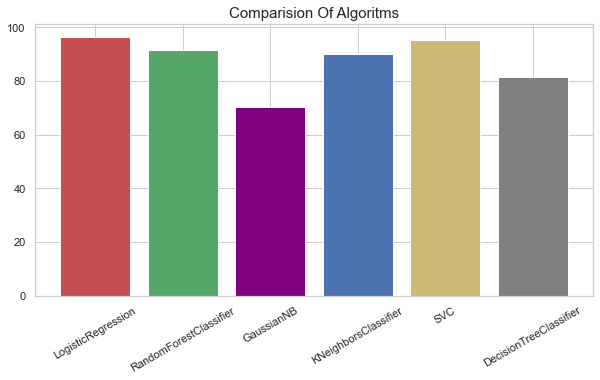

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Comparision Of Algoritms',fontsize=15)
plt.bar(models,results,color=['r','g','purple','b','y','grey'])
plt.xticks(rotation = 30)

#### From these results, it would suggest logistic regression is worthy of further study on this problem.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=42)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[796   4   0   0   0   0]
 [  0 628  55   6   0   0]
 [  0  39 745   0   0   0]
 [  3   6   0 857   5   6]
 [  0   0   1   4 576   6]
 [  0   0   2   6   9 618]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       800
           1       0.93      0.91      0.92       689
           2       0.93      0.95      0.94       784
           3       0.98      0.98      0.98       877
           4       0.98      0.98      0.98       587
           5       0.98      0.97      0.98       635

    accuracy                           0.97      4372
   macro avg       0.97      0.96      0.96      4372
weighted avg       0.97      0.97      0.97      4372

0.9652333028362305


### 6.HyperTuning of Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 1, 100]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Create grid search using 5-fold cross validation
grid = GridSearchCV(clf, hyperparameters, cv=5, verbose=1, n_jobs=-1)

In [ ]:
# Fit grid search
best_model = grid.fit(X, Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.3s finished


In [ ]:
# View best hyperparameters
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [ ]:
grid.best_estimator_

LogisticRegression(C=0.1)

In [ ]:
final_model = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[799   0   0   1   0   0]
 [  0 628  55   6   0   0]
 [  0  36 747   0   1   0]
 [  3   5   1 857   4   7]
 [  0   0   1   6 575   5]
 [  0   0   2   7   9 617]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       0.94      0.91      0.92       689
           2       0.93      0.95      0.94       784
           3       0.98      0.98      0.98       877
           4       0.98      0.98      0.98       587
           5       0.98      0.97      0.98       635

    accuracy                           0.97      4372
   macro avg       0.97      0.97      0.97      4372
weighted avg       0.97      0.97      0.97      4372



0.9659194876486734